# ---------------------------------------------------------------------------------------------------------------<br><br>CORONARY HEART DISEASE PREDICTION<br><br>---------------------------------------------------------------------------------------------------------------

### Project Objective : 
#### To analyse the factors leading to coronary heart diseases and predict if the patient has 10 year risk of Coronary Heart Disease in the future.
##  


### Dataset Source : https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

## 

### About Dataset :
#### The data is collected from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.<br><br> The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).<br><br>The dataset includes 4,240 patients records and 16 attributes.

### Import Libraries

In [145]:
# Loading data & visualisations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

# Resampling imbalanced data
from sklearn.utils import resample 

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Splitting data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve 

### Reading Data

In [40]:
chd_data=pd.read_csv("Data\\framingham.csv")
chd_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Data Cleaning

In [41]:
# Changing attribute name 'male' to 'gender'
chd_data=chd_data.rename(columns={'male':'gender'})
chd_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [42]:
# In gender column :
# 0 - Female
# 1 - Male

In [43]:
chd_data.shape

(4240, 16)

In [44]:
chd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Attributes:
  education: 1 - Some High School; 2 - High School or GED; 3 - Some College or Vocational School; 4 - college
  ##### Binary variables:
   sex: male(0) or female(1)<br>
   currentSmoker: whether or not the patient is a smoker <br>
   BPMeds: whether the patient was on blood pressure medication <br>
   prevalentStroke: whether or not the patient previously had a stroke <br>
   prevalentHyp: whether or not the patient had hypertension<br>
   diabetes: whether or not the patient had diabetes<br><br>
 ##### Continuous variables:
  age: age of the patient<br>
  cigsPerDay: Number of cigarettes that the person used on average in a day<br>
  totChol: Total cholesterol level (mg/dL) <br>
  sysBP: Systolic blood pressure (mmHg) - Systolic blood pressure measures the force your heart exerts on the walls of your arteries every time it beats.<br>
  diaBP: Diastolic blood pressure (mmHg) -  Diastolic blood pressure measures the force your heart exerts on the walls of your arteries in between beats. <br>
  BMI: Body Mass Index (Weight/Height) <br>
  heartRate: Heart rate(beats/min) <br>
  glucose: Glucose level (mg/dL)<br><br>
 ##### Target Variable :
  TenYearCHD: 10 year risk of coronary heart disease CHD (“1” : “Yes”, “0” : “No”) 
  ## 
  
  

##### Dropping column' education' since it is not required here.

In [45]:
chd_data=chd_data.drop('education',axis=1)
chd_data.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Missing Values

In [46]:
na_cols=chd_data.isnull().sum().sort_values(ascending=False)
na_cols

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
gender               0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

##### Percentage of missing values

In [47]:
na_cols=na_cols/len(chd_data)*100

In [48]:
na_cols

glucose            9.150943
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
gender             0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

Except rows of 'glucose' column, drop rows of all other missing values. Since 'glucose' contains 9% missing values and the variable is also significant, it is better to impute missing values rather than just dropping them.

In [49]:
chd_data.dropna(subset=['cigsPerDay','BPMeds','heartRate','totChol','BMI'],inplace=True)

In [50]:
chd_data.shape

(4090, 15)

In [51]:
chd_data.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            339
TenYearCHD           0
dtype: int64

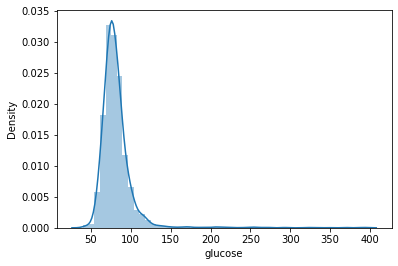

In [52]:
# To see the distribution of glucose variable
sns.distplot(chd_data['glucose'])
plt.show()

More number of people have glucose levels between 50-130 

In [53]:
### Imputing missing values with random values  

In [54]:
avg_glucose=chd_data['glucose'].mean()
std_glucose=chd_data['glucose'].std()
print('Mean:',avg_glucose)
print('SD:',std_glucose)

Mean: 81.88003199146894
SD: 23.882233365111432


In [55]:
# iterating through rows and replacing missing values
for i,data in chd_data.iterrows(): 
    if pd.isnull(data["glucose"]):
      r=np.random.uniform(avg_glucose-std_glucose,avg_glucose+std_glucose)
      r=np.round(r,2)
      chd_data.at[i,'glucose']=r
      print(i," ",chd_data.at[i,'glucose'])


14   104.57
21   73.47
26   101.24
54   89.65
70   66.12
111   93.69
114   75.37
203   84.87
211   73.41
215   71.81
216   89.39
246   103.75
250   102.75
263   90.54
273   101.04
279   103.25
282   70.04
296   87.45
301   77.12
302   89.41
309   64.98
315   73.56
329   86.03
338   88.14
343   81.42
345   72.57
355   78.2
382   91.14
407   66.76
413   69.55
418   59.47
425   98.81
427   96.5
428   94.8
433   63.23
436   102.67
448   84.43
455   100.08
456   58.65
467   92.36
487   99.68
490   74.4
499   63.17
511   74.64
519   102.21
540   62.12
552   85.72
563   96.6
576   68.55
591   93.15
645   87.14
661   73.3
675   100.5
679   78.08
690   68.22
714   86.51
755   78.84
757   77.0
760   95.38
777   99.7
778   95.81
779   89.24
812   95.4
813   60.84
829   99.12
832   83.7
872   67.82
883   94.39
896   93.99
905   77.55
917   71.25
922   74.03
936   99.53
939   97.85
942   59.38
972   70.71
995   81.96
999   76.83
1019   59.96
1028   81.84
1063   103.17
1064   103.53
1101   100.41
11

In [56]:
chd_data.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [57]:
chd_data.shape

(4090, 15)

### Outliers

#### Analysing continuous variables based on their statistical values like min, max, mean values

In [58]:
chd_data.describe()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,0.434719,49.499511,0.490220,8.995355,0.029340,0.005379,0.309291,0.025428,236.659658,132.226528,82.892665,25.797645,75.836186,81.906257,0.149389
std,0.495781,8.542193,0.499965,11.913388,0.168778,0.073153,0.462258,0.157440,44.467756,21.901522,11.839483,4.077631,12.063481,23.216602,0.356515
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


1. In this data, age of patients lies between 32-70 years and average age is around 50 years.
2. On an average, 9 cigarettes were used.
3. Maximum of totChol level is 696 mg/dL which seems odd. It can be an outlier
4. Generally, normal patients have systolic BP < 120 mm Hg & diastolic BP < 80 mm Hg. Having higher Systolic BP & diastolic BP leads to hypertension. In this data, patients on an average have sysBP = 132 & diaBP = 82 which is quite normal but the max value of sysBP seems quite odd.
5. Glucose level < 140 mg/dL is normal. A reading of more than 200 mg/dL indicates diabetes. A reading between 140 and 199 mg/dL indicates prediabetes.

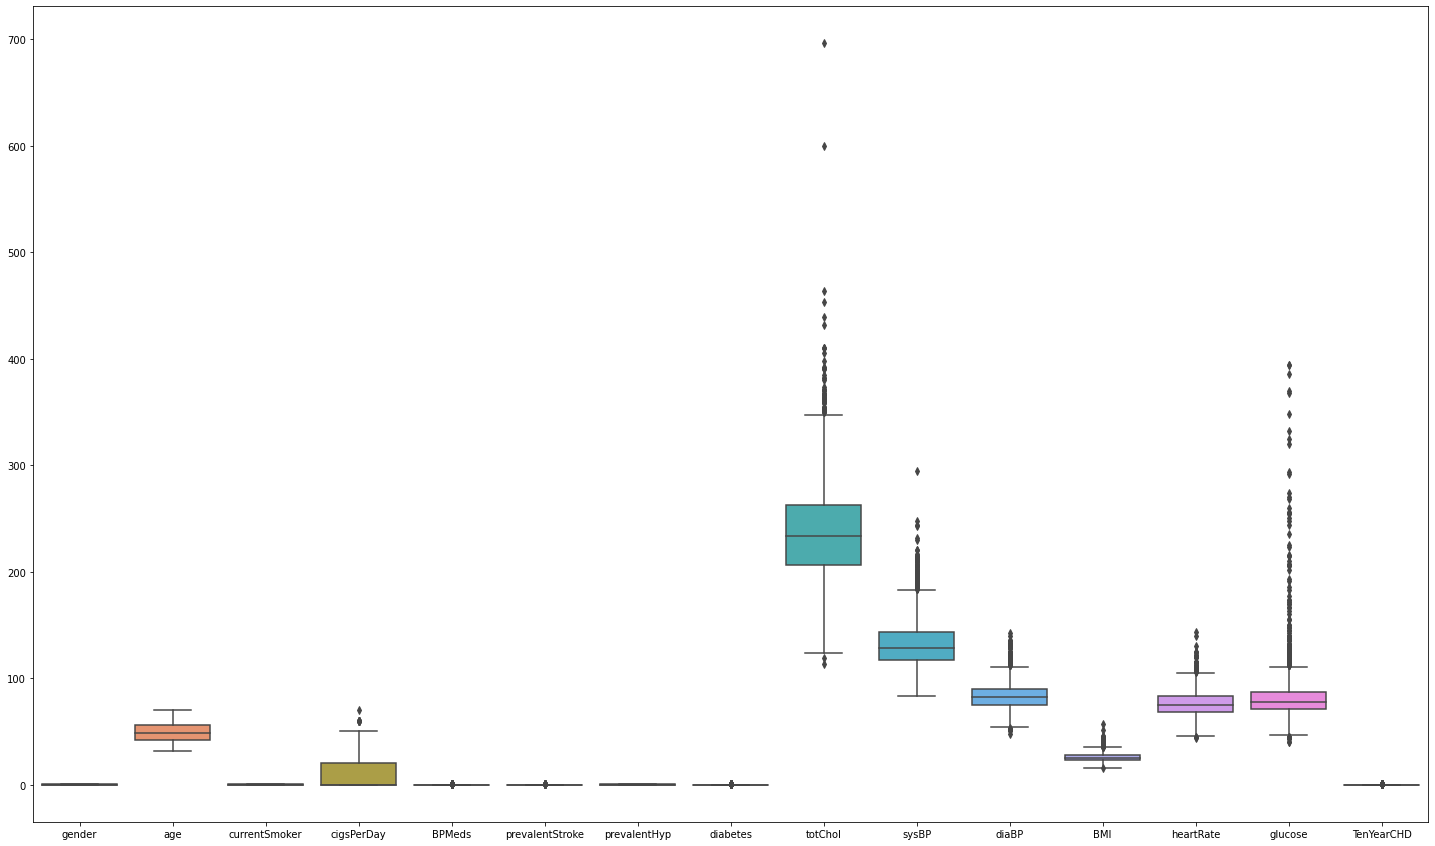

In [59]:
plt.figure(figsize=(25,15))
sns.boxplot(data=chd_data)
plt.show()

 Remove outliers for totChol and sysBP column as there are 2 values that are very far from remaining data points. Outliers for other variables are significant and hence can't be removed

In [60]:
chd_data['totChol'].max()

696.0

In [61]:
chd_data=chd_data[chd_data['totChol']<600]

In [62]:
chd_data['sysBP'].max()

295.0

In [63]:
chd_data=chd_data[chd_data['sysBP']<295]

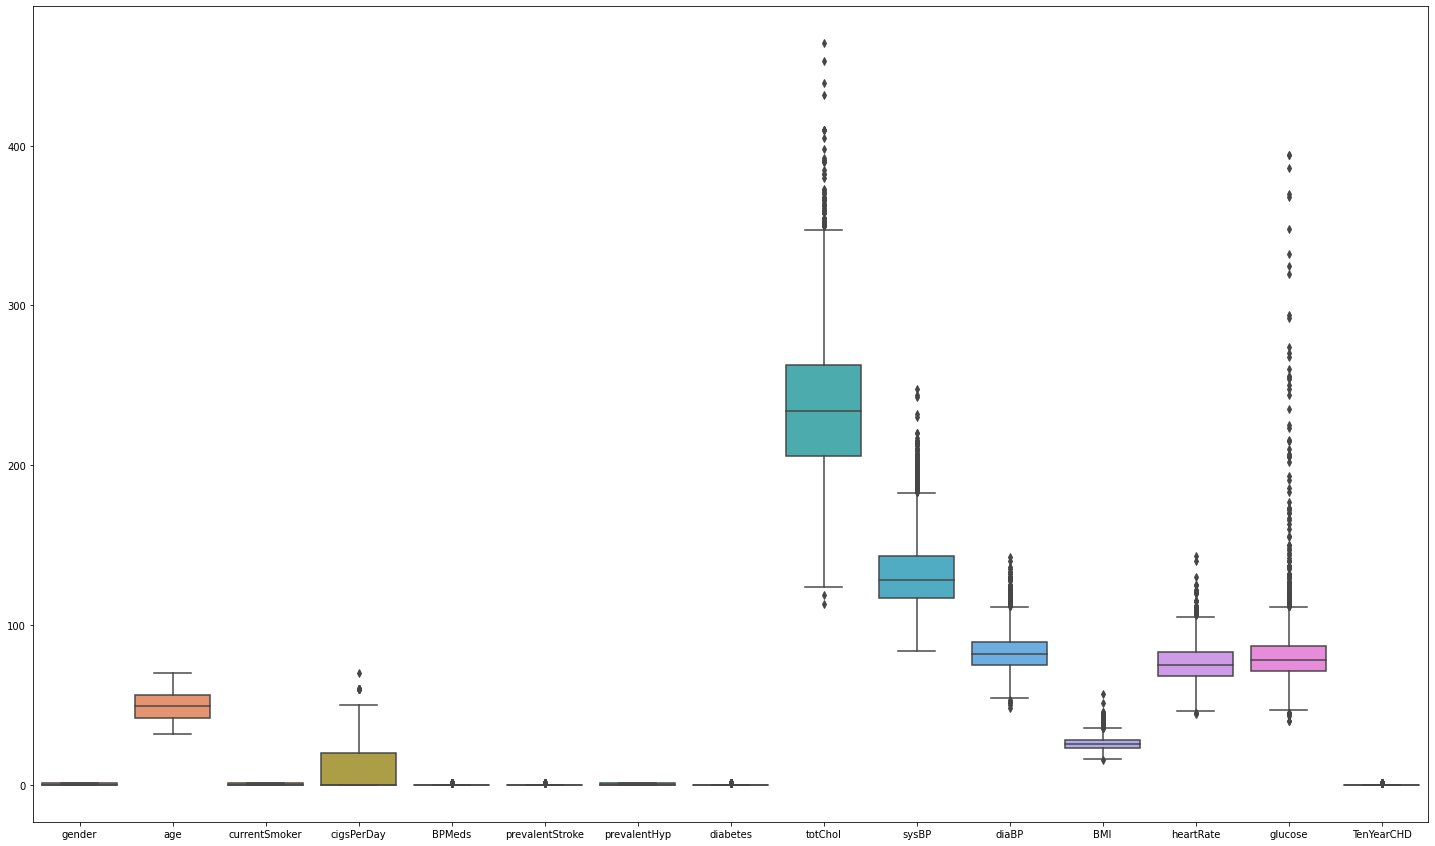

In [64]:
plt.figure(figsize=(25,15))
sns.boxplot(data=chd_data)
plt.show()

In [65]:
chd_data.shape

(4087, 15)

### EDA

#### Distribution of target variable

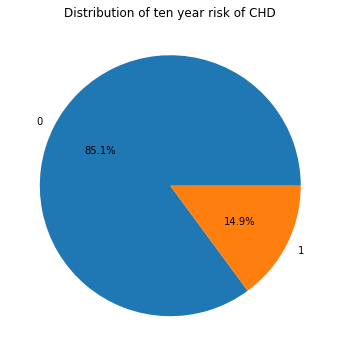

In [66]:
plt.figure(figsize = (6,6))
plt.pie(chd_data['TenYearCHD'].value_counts(),labels=[0,1],autopct='%1.1f%%')
plt.title('Distribution of ten year risk of CHD')
plt.show()

Target variable is highly imbalanced

### Which gender has hisgh risk of CHD ?

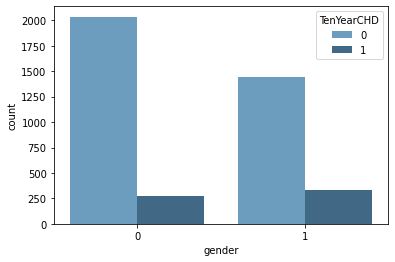

In [36]:
sns.countplot(x = 'gender', hue = 'TenYearCHD', data = chd_data, palette = 'Blues_d')
plt.show()

We can observe that, out of all men, there is slightly higher chance for men to have risk of CHD than women 

### Which age group is more likely to be affected ?

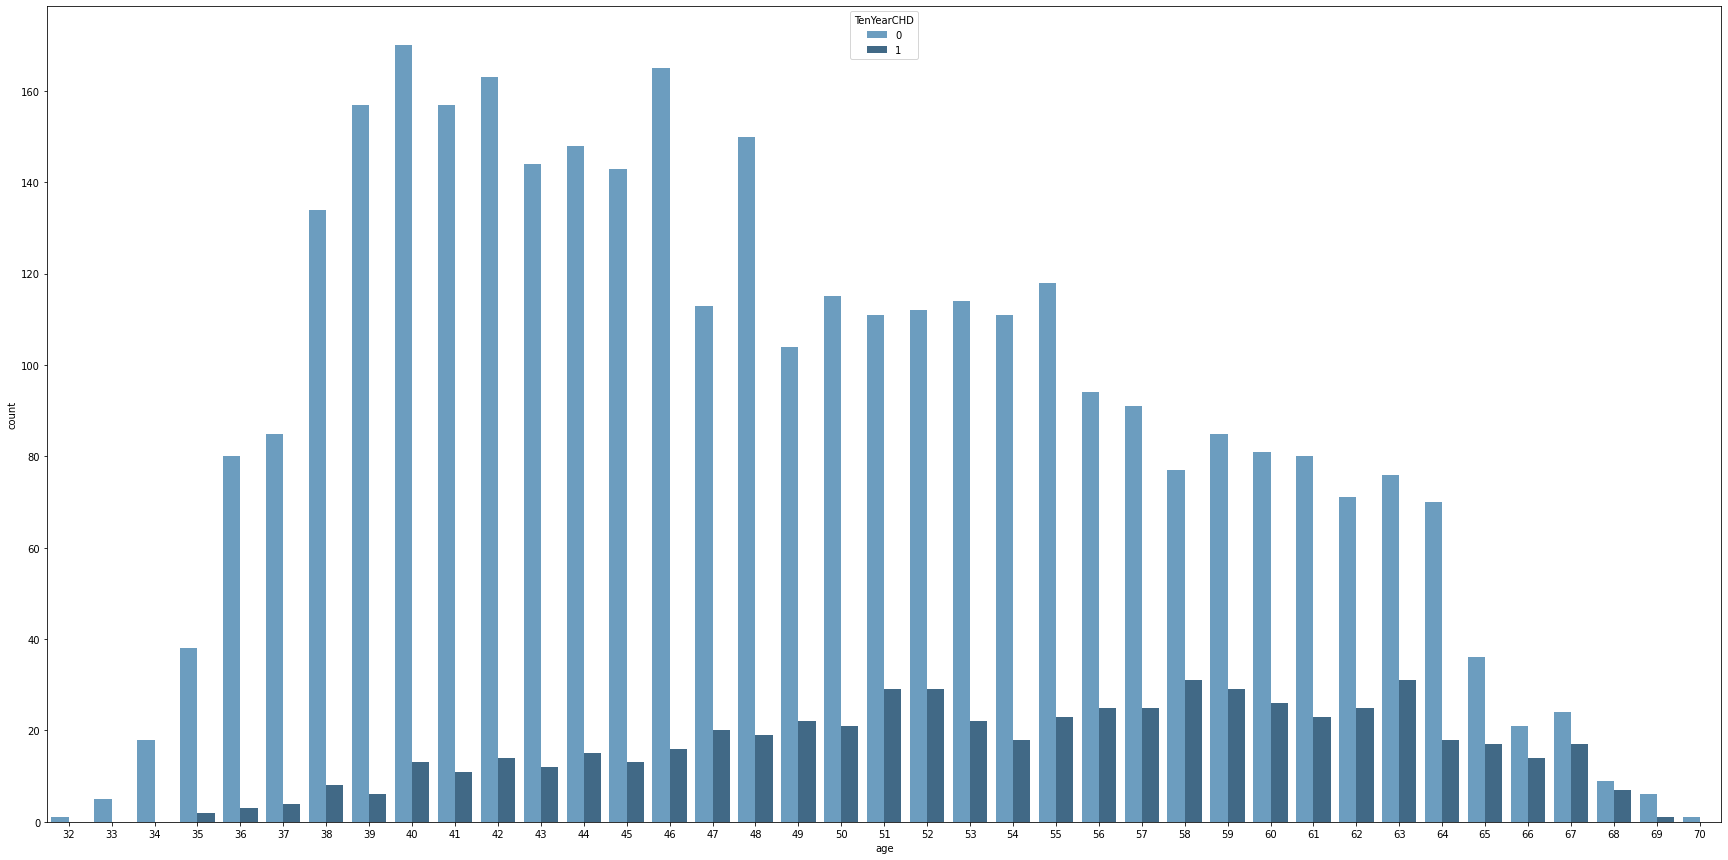

In [69]:
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x = 'age', hue = 'TenYearCHD', data = chd_data, palette = 'Blues_d')
plt.show()

People having age group of 63-70 are more risky to get CHD

### Effect of No. of Cigarettes per day 

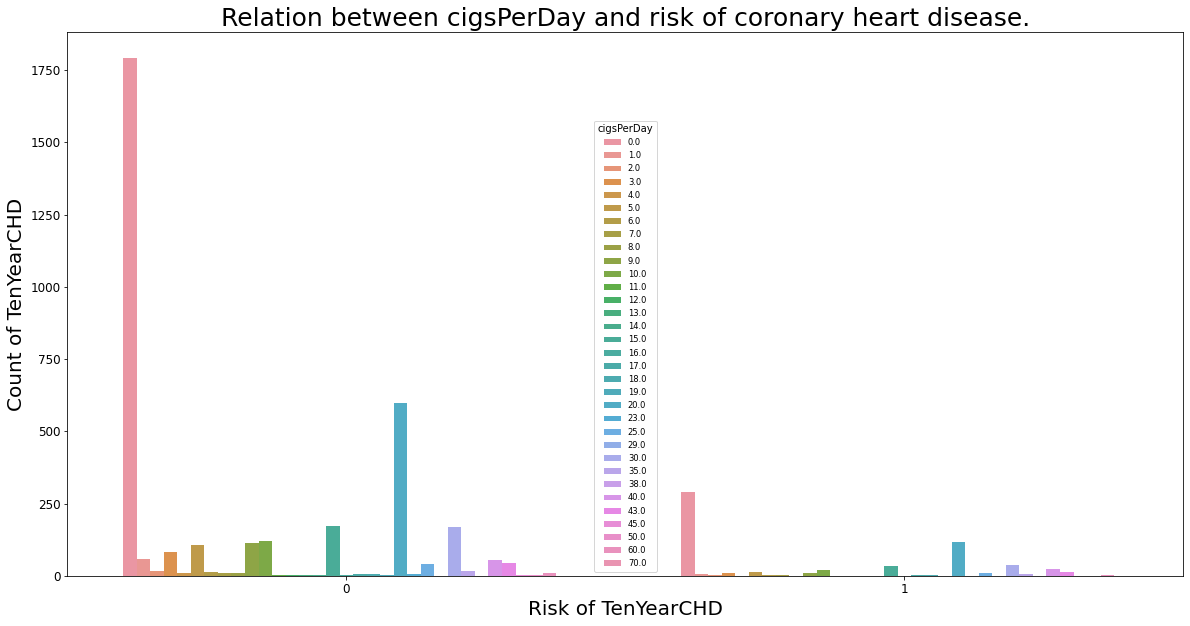

In [76]:
plt.figure(figsize=(20,10), facecolor='w')
sns.countplot(x="TenYearCHD",data=chd_data,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='small')
plt.title("Relation between cigsPerDay and risk of coronary heart disease.", size=25)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

 People who don't smoke have lower risks of CHD but it doesn't guarantee much lower risk as the people who don/t smoke may also have the risk of CHD

### Relation between BP and target variable

In [100]:
s = chd_data.groupby("TenYearCHD",as_index=False).sysBP.mean()
s

,TenYearCHD,sysBP
0,0,130.246981
1,1,142.987637


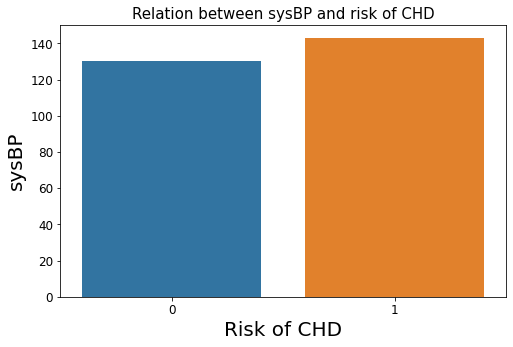

In [107]:
plt.figure(figsize=(8,5), facecolor='w')
sns.barplot(x=s["TenYearCHD"], y=s["sysBP"])
plt.title("Relation between sysBP and risk of CHD", size=15)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

On an average, people having sysBP < 130 have lower risk  

In [109]:
d = chd_data.groupby("TenYearCHD",as_index=False).diaBP.mean()
d

,TenYearCHD,diaBP
0,0,82.159574
1,1,87.007332


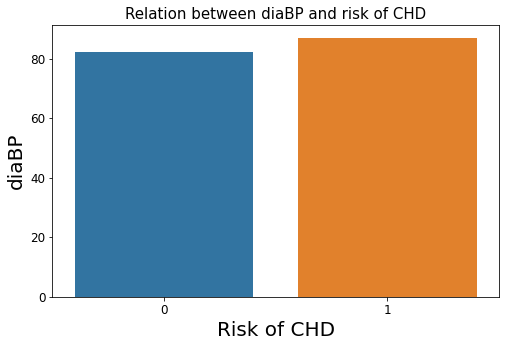

In [111]:
plt.figure(figsize=(8,5), facecolor='w')
sns.barplot(x=d["TenYearCHD"], y=d["diaBP"])
plt.title("Relation between diaBP and risk of CHD", size=15)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

People having diaBp < 80 are likely to have lower risk of CHD

### Does having diabetes leads to the risk of getting CHD ?

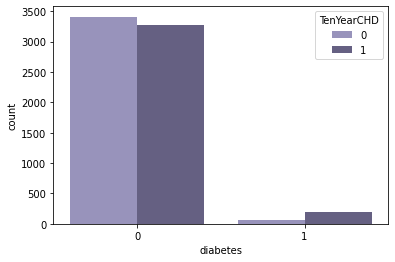

In [130]:
sns.countplot(x = 'diabetes', hue = 'TenYearCHD', data = chd_data, palette = 'Purples_d')
plt.show()

Out of all people who have diabetes, there are more no. of persons having the risk of CHD. So having diabetes leads to the risk of heart disease

#### Correlation

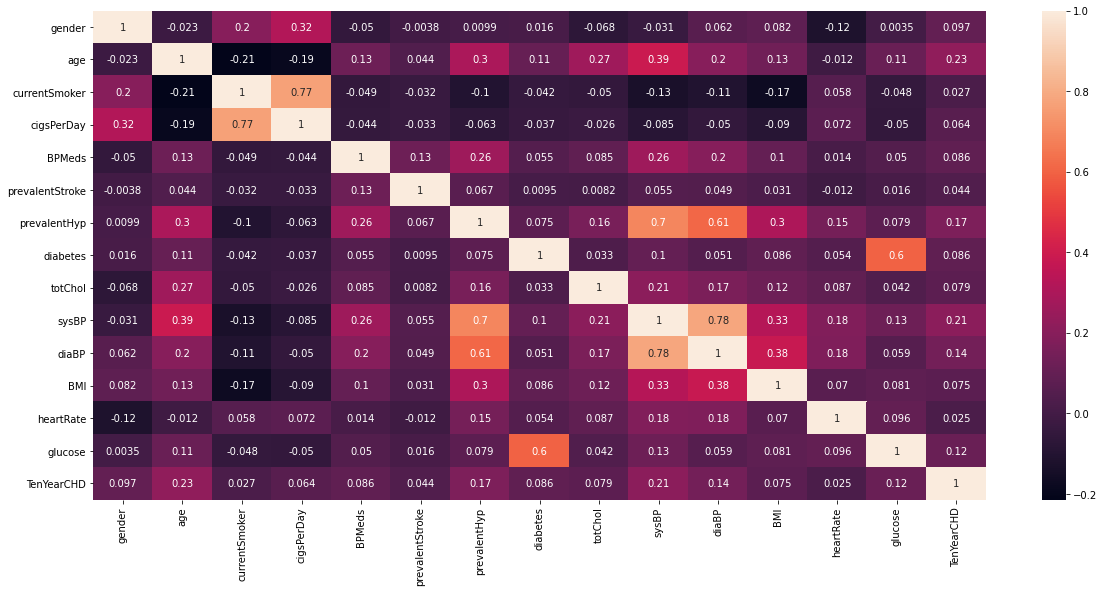

In [36]:
plt.figure(figsize=(20,9))
c=chd_data.corr()
sns.heatmap(c,annot=True)
plt.show()

### Resampling data 

From the EDA, we have seen that the target variable is highly imbalanced. So resampling technique is used to avoid bias in the data 

In [131]:
target1=chd_data[chd_data['TenYearCHD']==1]
target0=chd_data[chd_data['TenYearCHD']==0]

In [132]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [133]:
chd_data=pd.concat([target0,target1])
chd_data['TenYearCHD'].value_counts()

0    3478
1    3478
Name: TenYearCHD, dtype: int64

In [134]:
np.shape(chd_data)

(6956, 15)

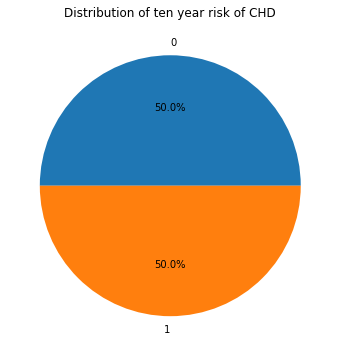

In [135]:
plt.figure(figsize = (6,6))
plt.pie(chd_data['TenYearCHD'].value_counts(),labels=[0,1],autopct='%1.1f%%')
plt.title('Distribution of ten year risk of CHD')
plt.show()

### Feature Selection

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # statistical measure chi2 value to get score for each feature

X=chd_data.drop("TenYearCHD",axis=1) #all feature variables
y=chd_data["TenYearCHD"] # target variable
feature_selector=SelectKBest(score_func=chi2,k='all')
fs_fit=feature_selector.fit(X,y)
#printing feature scores
for i in range(len(fs_fit.scores_)):
    print(chd_data.columns[i],";",fs_fit.scores_[i])

gender ; 78.03030303030303
age ; 926.8108438326683
currentSmoker ; 8.73055242390079
cigsPerDay ; 874.4414930326124
BPMeds ; 59.265306122448976
prevalentStroke ; 19.444444444444443
prevalentHyp ; 234.13527460375968
diabetes ; 57.689922480620154
totChol ; 540.6405448572594
sysBP ; 2040.2975946936106
diaBP ; 479.92250448321875
BMI ; 58.97563262826441
heartRate ; 15.741988550620349
glucose ; 895.4293462164298


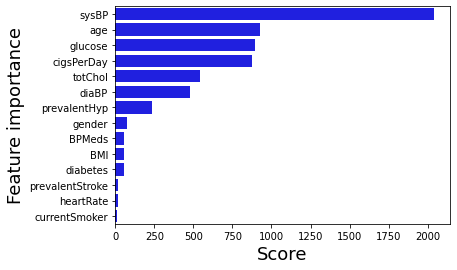

In [137]:
Dataset=pd.DataFrame()
Dataset['Features']=X.columns[range(len(fs_fit.scores_))]
Dataset['Scores']=fs_fit.scores_
Dataset=Dataset.sort_values(by='Scores',ascending=False)
sns.barplot(Dataset['Scores'],Dataset['Features'],color='blue')
plt.ylabel('Feature importance',fontsize=18)
plt.xlabel('Score',fontsize=18)
plt.show()

Selecting only best 11 columns

In [138]:
bestcols=SelectKBest(chi2,k=11).fit(X,y)
X_new=bestcols.fit_transform(X, y)
X_new.shape

(6956, 11)

In [90]:
X=X_new

### Scaling

In [91]:
from scipy.stats import shapiro
for col in cts_cols:
    stat,p=shapiro(chd_data[col])
    if p > 0.05:
        print(col," is Gaussian")
    else:
        print(col,"is not Gaussian(reject H0)")

age is not Gaussian(reject H0)
cigsPerDay is not Gaussian(reject H0)
totChol is not Gaussian(reject H0)
sysBP is not Gaussian(reject H0)
diaBP is not Gaussian(reject H0)
BMI is not Gaussian(reject H0)
heartRate is not Gaussian(reject H0)
glucose is not Gaussian(reject H0)


 Since all the variables are not normally distributed, we use MinMax scaler here

In [92]:
### Splitting data into train & test data and Scaling

In [93]:
from sklearn.model_selection import train_test_split  # for splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [95]:
from sklearn.preprocessing import MinMaxScaler  # for normalising data
minmax=MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test= minmax.transform(X_test)

### Models

We use the following machine learning models :<br><br>1. Logistic Regression<br>2. KNN<br>3. Random Forest Classifier

#### Logistic Regression

In [139]:
m1 = 'LogisticRegression'
LR = LogisticRegression(random_state=1, max_iter=1000)
LR.fit(X_train, y_train)
LR_predict = LR.predict(X_test)

In [140]:
print("accuracy: {}%".format(round(accuracy_score(y_test, LR_predict)*100,2)))

print("Precision : {}".format(precision_score(y_test,LR_predict)))

from sklearn.metrics import recall_score
print("Recall : {}".format(recall_score(y_test,LR_predict)))

from sklearn.metrics import f1_score
print("F1 score: {}".format(f1_score(y_test,LR_predict)))

accuracy: 68.71%
Precision : 0.6886171213546566
Recall : 0.6944971537001897
F1 score: 0.6915446386395842


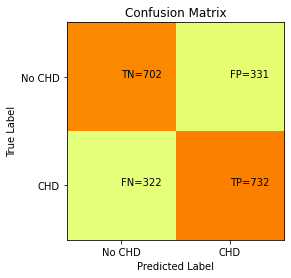

In [141]:
# visualising confusion matrix
cm1=confusion_matrix(y_test,LR_predict)
plt.clf()
plt.imshow(cm1,cmap=plt.cm.Wistia)  #cmap is color map
classnames=['No CHD','CHD']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames) #rotation=45
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm1[i][j])) #putting the text at position(j,i) on matrix
plt.show()

In [142]:
# For ROC (Receiver Operating Characteristic)
fpr1,tpr1,thresholds1=roc_curve(y_test,LR.predict_proba(X_test)[:,1])
LR_roc_auc=roc_auc_score(y_test,LR.predict(X_test))
LR_roc_auc

0.6870356049236668

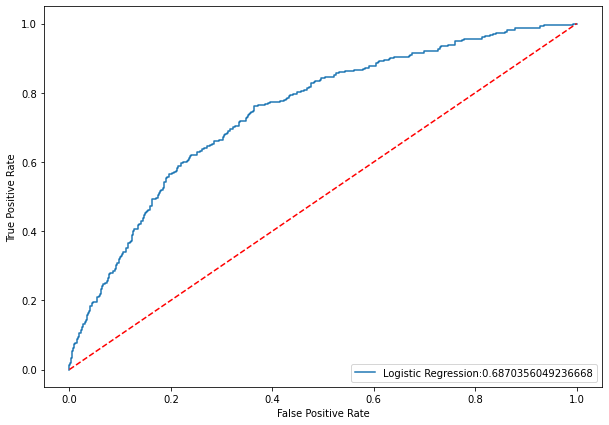

In [144]:
plt.figure(figsize=(10,7))
plt.plot(fpr1,tpr1,label=f'Logistic Regression:{LR_roc_auc}')
plt.plot([0,1],[0,1],'r--') #r-- is for red dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### KNN

In [149]:
m2 = 'KNN'
KNN= KNeighborsClassifier(n_neighbors=40)
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [150]:
print("accuracy: {}%".format(round(accuracy_score(y_test, KNN_predict)*100,2)))

print("Precision : {}".format(precision_score(y_test,KNN_predict)))

print("Recall : {}".format(recall_score(y_test,KNN_predict)))

print("F1 score: {}".format(f1_score(y_test,KNN_predict)))

accuracy: 68.62%
Precision : 0.6993006993006993
Recall : 0.6641366223908919
F1 score: 0.6812652068126521


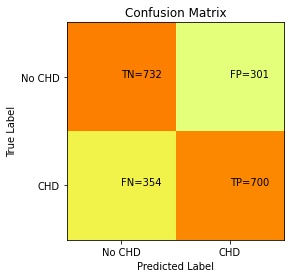

In [151]:
# visualising confusion matrix
cm1=confusion_matrix(y_test,KNN_predict)
plt.clf()
plt.imshow(cm1,cmap=plt.cm.Wistia)  #cmap is color map
classnames=['No CHD','CHD']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames) #rotation=45
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm1[i][j])) #putting the text at position(j,i) on matrix
plt.show()

In [152]:
# For ROC (Receiver Operating Characteristic)
fpr2,tpr2,thresholds2=roc_curve(y_test,KNN.predict_proba(X_test)[:,1])
KNN_roc_auc=roc_auc_score(y_test,KNN.predict(X_test))
KNN_roc_auc

0.6863761524345553

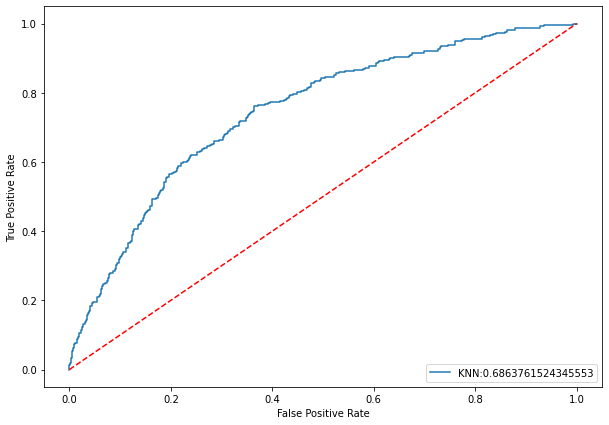

In [153]:
plt.figure(figsize=(10,7))
plt.plot(fpr1,tpr1,label=f'KNN:{KNN_roc_auc}')
plt.plot([0,1],[0,1],'r--') #r-- is for red dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [154]:
m3 = 'Random Forest'
RF = RandomForestClassifier(n_estimators=110,bootstrap = True,
                               max_features = 'sqrt') 
RF.fit(X_train, y_train)
RF_predict = RF.predict(X_test)

In [155]:
print("accuracy: {}%".format(round(accuracy_score(y_test, RF_predict)*100,2)))

print("Precision : {}".format(precision_score(y_test,RF_predict)))

print("Recall : {}".format(recall_score(y_test,RF_predict)))

print("F1 score: {}".format(f1_score(y_test,RF_predict)))

accuracy: 96.36%
Precision : 0.939748201438849
Recall : 0.99146110056926
F1 score: 0.9649122807017544


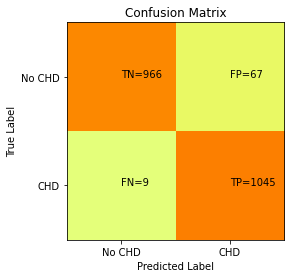

In [156]:
# visualising confusion matrix
cm1=confusion_matrix(y_test,RF_predict)
plt.clf()
plt.imshow(cm1,cmap=plt.cm.Wistia)  #cmap is color map
classnames=['No CHD','CHD']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames) #rotation=45
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm1[i][j])) #putting the text at position(j,i) on matrix
plt.show()

In [157]:
# For ROC (Receiver Operating Characteristic)
fpr3,tpr3,thresholds3=roc_curve(y_test,RF.predict_proba(X_test)[:,1])
RF_roc_auc=roc_auc_score(y_test,RF.predict(X_test))
RF_roc_auc

0.96330073421493

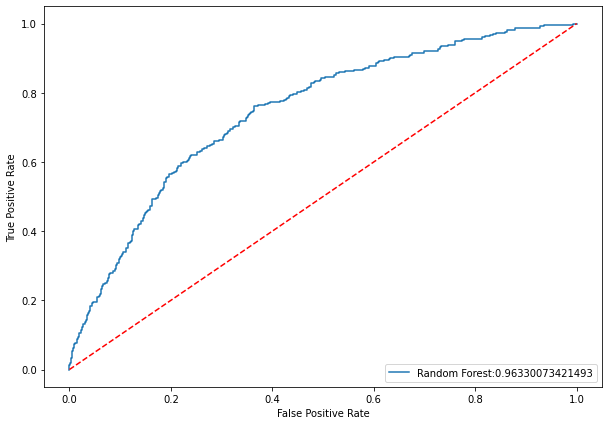

In [158]:
plt.figure(figsize=(10,7))
plt.plot(fpr1,tpr1,label=f'Random Forest:{RF_roc_auc}')
plt.plot([0,1],[0,1],'r--') #r-- is for red dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Evaluating Model

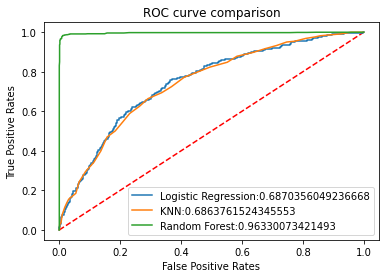

In [159]:
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr1, tpr1, label= f'Logistic Regression:{LR_roc_auc}')
plt.plot(fpr2, tpr2, label= f'KNN:{KNN_roc_auc}')
plt.plot(fpr3, tpr3, label= f'Random Forest:{RF_roc_auc}')

plt.legend()
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title('ROC curve comparison')
plt.show()

 Since it is balanced classification problem, we evaluate models based on accuracies. However, we are also concerned with reducing false negatives because a person who actually is risky of getting CHD but being predicted as not risky of CHD is more dangerous than the otherwise, so we consider recall as well. <br>From the above roc curve comparisons also, it is evident that Random Forest model is best suitable model for our dataset.

## 



## ----------------------------------------------------             THANK YOU              ------------------------------------------------

### SAMANVITHA PATHI <br><br> UID : 209019 <br><br> Roll No. 15